In [20]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud
from stop_words import get_stop_words
import re
import seaborn as sns
import random
from os import path

from subprocess import check_output
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('E:\양지환\Presidential_Debate\debate.csv',encoding = 'iso-8859-1')

In [8]:
data.head(10)

,Line,Speaker,Text,Date
0,1,Holt,Good evening from Hofstra University in Hempst...,9/26/16
1,2,Audience,(APPLAUSE),9/26/16
2,3,Clinton,"How are you, Donald?",9/26/16
3,4,Audience,(APPLAUSE),9/26/16
4,5,Holt,Good luck to you.,9/26/16
5,6,Audience,(APPLAUSE),9/26/16
6,7,Holt,"Well, I don't expect us to cover all the issue...",9/26/16
7,8,Clinton,"Well, thank you, Lester, and thanks to Hofstra...",9/26/16
8,9,Clinton,I also want to see more companies do profit-sh...,9/26/16
9,10,Holt,"Secretary Clinton, thank you. Mr. Trump, the s...",9/26/16


In [9]:
debate = data.loc[data.Date== "9/26/16"]

In [10]:
debate.Speaker.drop_duplicates()

0           Holt
1       Audience
2        Clinton
10         Trump
36    CANDIDATES
Name: Speaker, dtype: object

In [24]:
TRUMP = "Trump"
CLINTON = "Clinton"

In [12]:
debate[(debate.Speaker=="CANDIDATES") & (debate.Text != "(CROSSTALK)")]

,Line,Speaker,Text,Date


In [13]:
# Wrong 이란 단어를 사용한 사람 및 Line
debate[debate['Text'].str.contains("Wrong")]

,Line,Speaker,Text,Date
156,157,Trump,Wrong. Wrong.,9/26/16
237,238,Trump,Wrong.,9/26/16
239,240,Trump,Wrong. Wrong.,9/26/16
280,281,Trump,Wrong.,9/26/16


In [14]:
# China 란 단어를 사용한 사람 및 Line
debate[debate['Text'].str.contains("China")]

,Line,Speaker,Text,Date
10,11,Trump,"Thank you, Lester. Our jobs are fleeing the co...",9/26/16
15,16,Trump,"Well, for one thing -- and before we start on ...",9/26/16
39,40,Clinton,Incomes went up for everybody. Manufacturing j...,9/26/16
146,147,Trump,That was more than a mistake. That was done pu...,9/26/16
225,226,Clinton,"... tough, long game here. And one of the thin...",9/26/16
229,230,Trump,I do want to say that I was just endorsed -- a...,9/26/16
230,231,Trump,You don't know who broke in to DNC. But what d...,9/26/16
275,276,Clinton,Let's talk about two important issues that wer...,9/26/16
293,294,Trump,"Well, I have to say that, you know, for what S...",9/26/16


In [15]:
# Korea 란 단어를 사용한 사람 및 Line
debate[debate['Text'].str.contains("Korea")]

,Line,Speaker,Text,Date
279,280,Clinton,... of what we heard Donald say has been about...,9/26/16
287,288,Trump,It's not an accurate one at all. It's not an a...,9/26/16
293,294,Trump,"Well, I have to say that, you know, for what S...",9/26/16
297,298,Clinton,"Well, let me -- let me start by saying, words ...",9/26/16


In [16]:
debate[debate['Line']==280]

,Line,Speaker,Text,Date
279,280,Clinton,... of what we heard Donald say has been about...,9/26/16


In [17]:
debate[debate['Line']==280]['Text']

279    ... of what we heard Donald say has been about...
Name: Text, dtype: object

In [21]:
stopwords = set(get_stop_words('en'))
stopwords |= {"look", "thing", "say", "said", "will", "well", "also"}

def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(20, 60)

def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(240, 100%%, %d%%)" % random.randint(20, 60)

def getWordCloud(candidate, col):
    words = " ".join(debate.loc[debate.Speaker == candidate]["Text"])
    wordcloud = WordCloud(max_font_size=40, relative_scaling=0.5,
                          background_color="white",
                          stopwords=stopwords,random_state=1).generate(words)
    
    plt.figure(figsize=(21,28))
    plt.imshow(wordcloud.recolor(color_func=col, random_state=3))
    plt.title(candidate + "'s Words in Debate")
    plt.axis("off")
    #plt.show()
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\SCSC\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

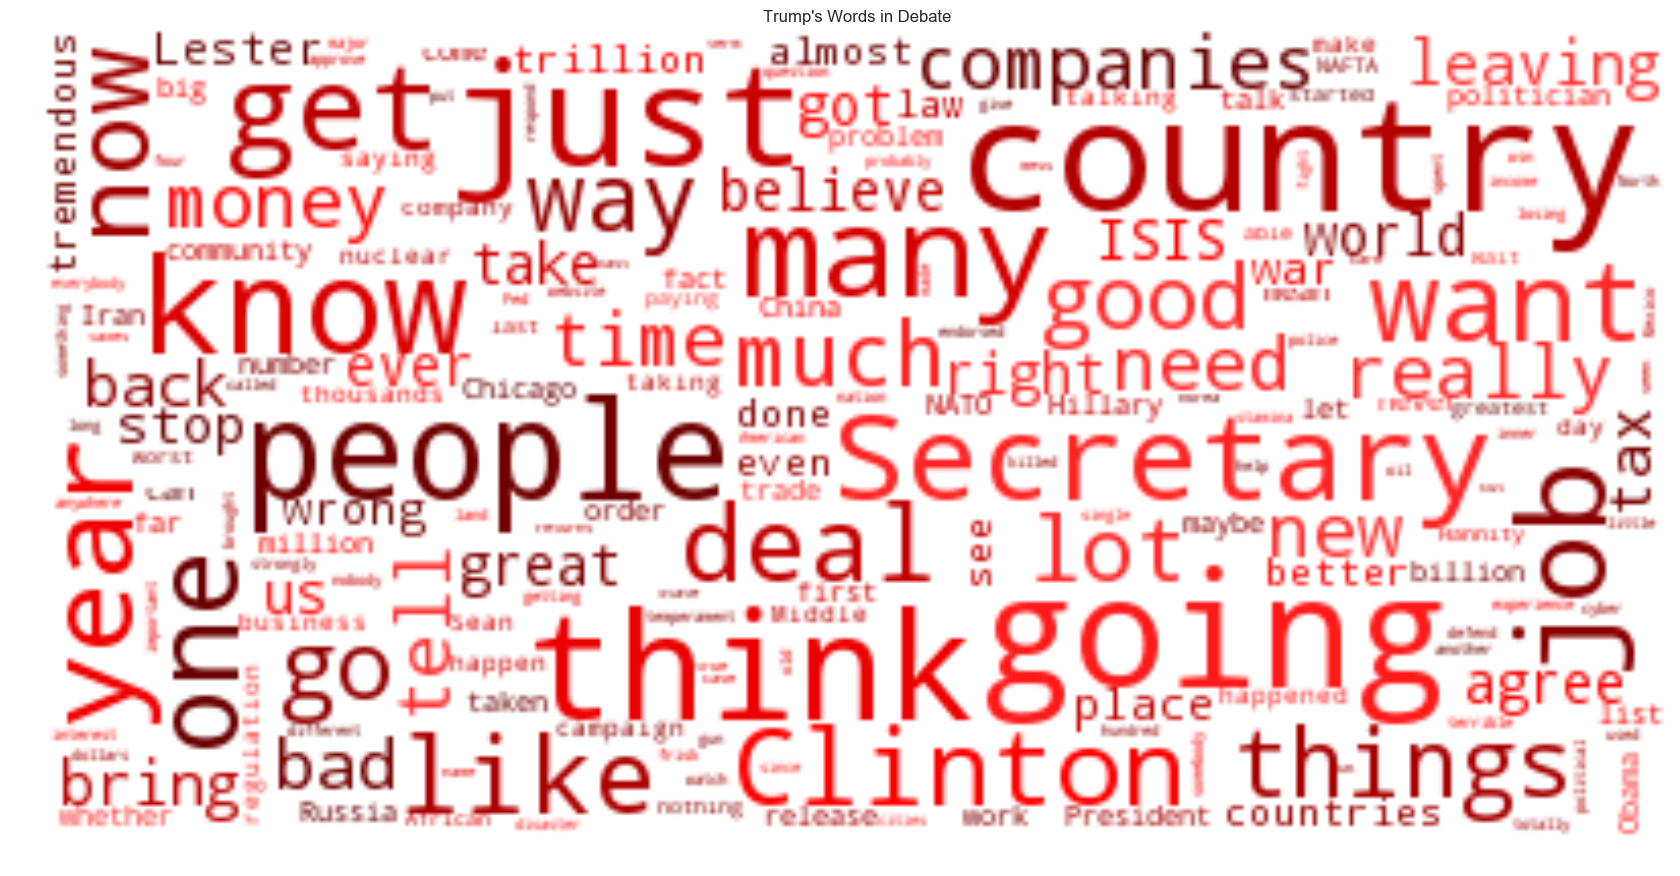

In [22]:
getWordCloud(TRUMP, red_color_func)

<module 'matplotlib.pyplot' from 'C:\\Users\\SCSC\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

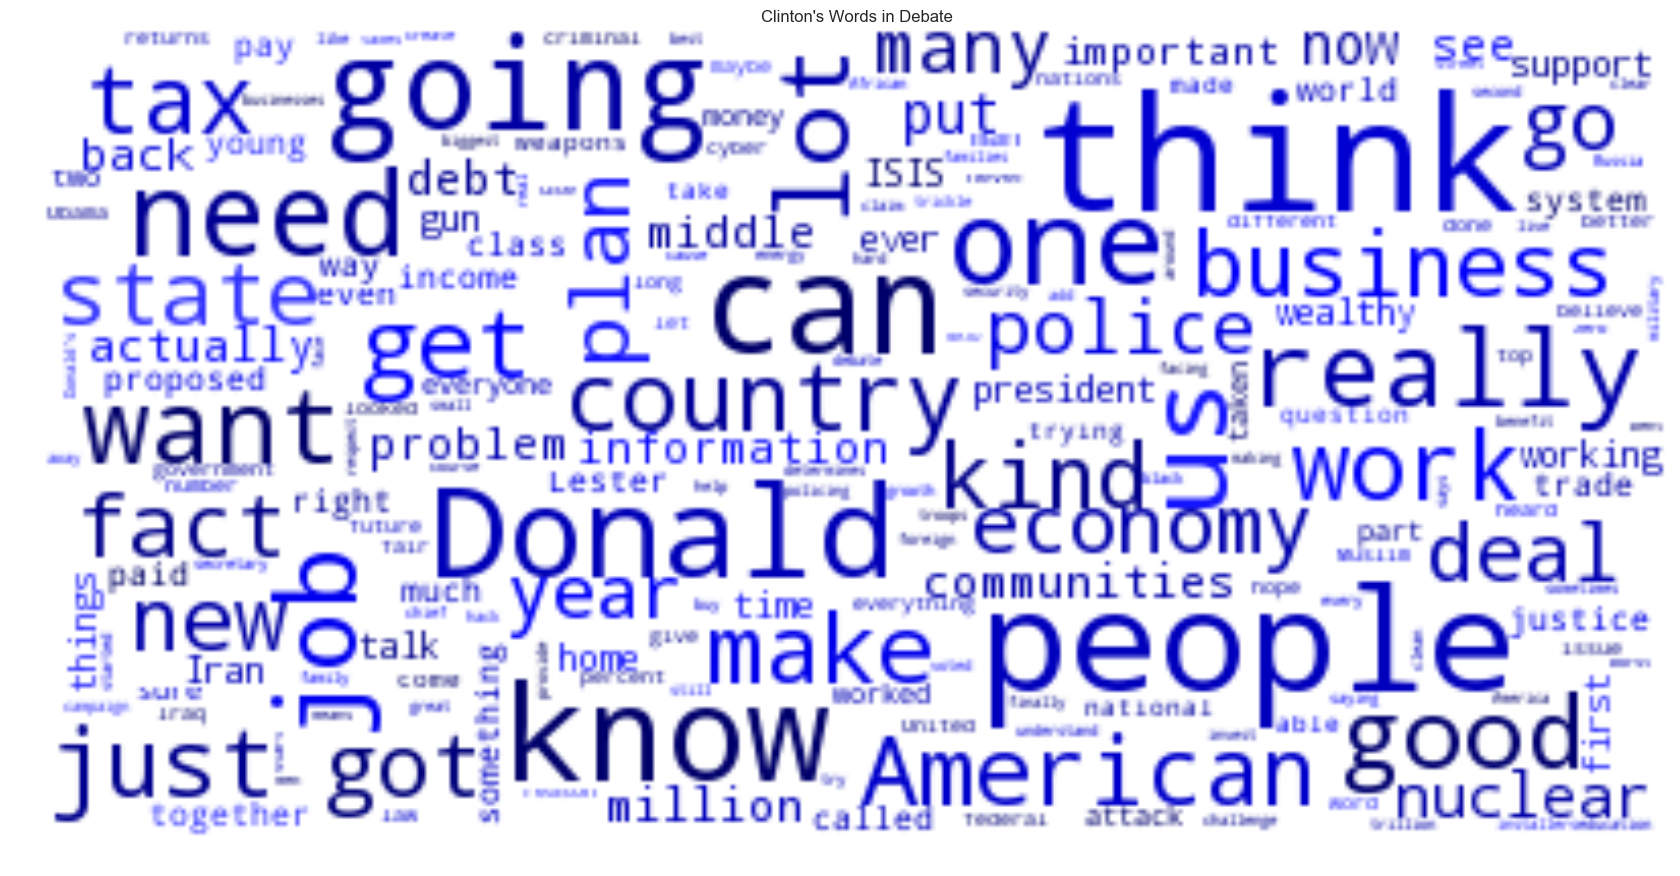

In [25]:
getWordCloud(CLINTON, blue_color_func)

In [26]:
#Extracting words from a string
#removing punctuation and returning a list with separated words
def getWords(text):
    return re.compile('\w+').findall(text)

In [27]:
#using word count as a proxy for time.
debate["Length"] = debate.Text.map(getWords).map(len)

C:\Users\SCSC\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


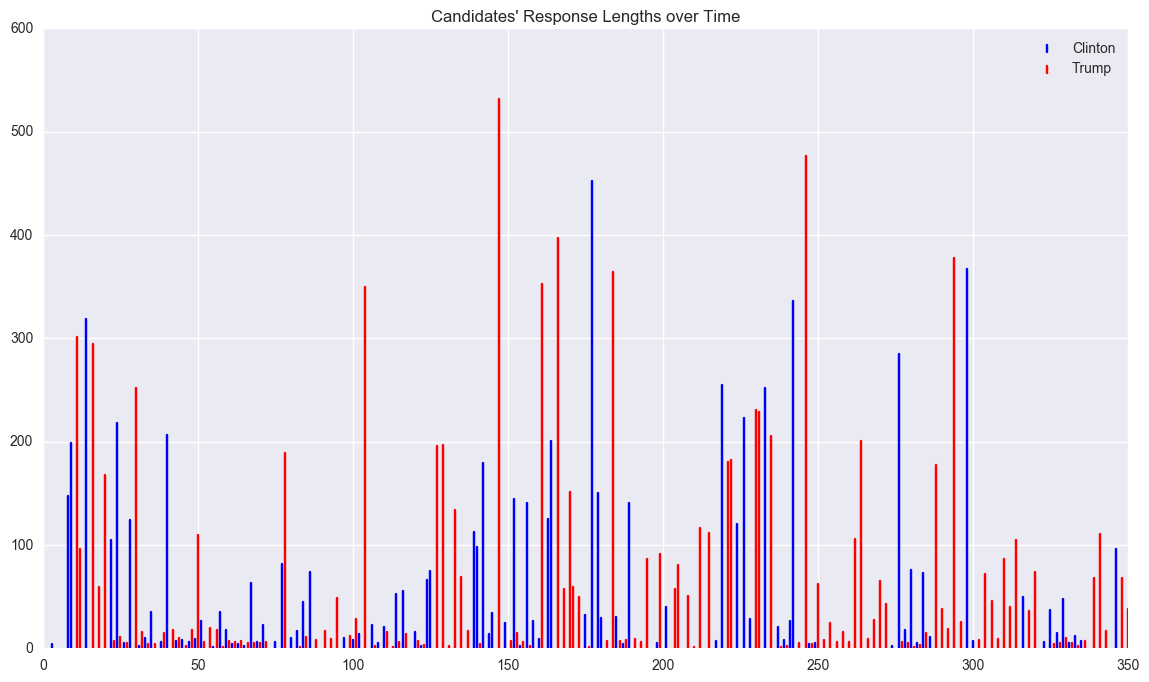

In [28]:
plt.figure(figsize=(14,8))
markerline, stemlines, baseline = plt.stem(debate[debate.Speaker == CLINTON].Line, 
               debate[debate.Speaker == CLINTON].Length,
               markerfmt=' ', label= CLINTON)
plt.setp(stemlines, 'color', 'b')
plt.setp(baseline, visible=False)

markerline, stemlines, baseline = plt.stem(debate[debate.Speaker == TRUMP].Line, 
               debate[debate.Speaker == TRUMP].Length,
               markerfmt=' ', label= TRUMP)
plt.setp(stemlines, 'color', 'r')
plt.setp(baseline, visible=False)
plt.legend()
plt.title("Candidates' Response Lengths over Time")
plt.show()